## Into DeepTrain
DeepTrain requires only (1) a compiled model and (2) data directory to run.<br>
This example covers these and a bit more to keep truer to standard use.

In [1]:
import os
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.models import Model

from deeptrain import TrainGenerator, DataGenerator

In [2]:
%config InlineBackend.figure_format = 'retina'  # greatly improve display quality

### Model maker
Begin by defining a model maker function. Input should specify hyperparameters, optimizer, learning rate, etc;<br> this is the "blueprint" which is later saved.

In [3]:
def make_model(batch_shape, optimizer, loss, metrics, num_classes,
               filters, kernel_size):
    ipt = Input(batch_shape=batch_shape)

    x = Conv2D(filters, kernel_size, activation='relu', padding='same')(ipt)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(num_classes)(x)

    out = Activation('softmax')(x)

    model = Model(ipt, out)
    model.compile(optimizer, loss, metrics=metrics)
    return model

### Model configs
Define configs dictionary to feed as `**kwargs` to `make_model`; we'll also pass it to TrainGenerator,<br>
which will save it and show in a "report" for easy reference

In [4]:
batch_size = 128
width, height, channels = 28, 28, 1  # MNIST dims (28 x 28 pixels, greyscale)

MODEL_CFG = dict(
    batch_shape=(batch_size, width, height, channels),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam',
    num_classes=10,
    filters=16,
    kernel_size=(3, 3),
)

### DataGenerator (train) configs
- `data_path`:    directory where image data is located
- `labels_path`: where labels file is located
- `batch_size`:  number of samples to feed at once to model
- `shuffle`:     whether to shuffle data at end of each epoch
- `superbatch_set_nums`: which files to load into a `superbatch`, which holds batches persisently in memory <br> 
  (as opposed to `batch`, which is overwritten after use). Since MNIST is small, we can load it all into RAM.

In [5]:
datadir = os.path.join("dir", "data", "image")
DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'train'),
    labels_path=os.path.join(datadir, 'train', 'labels.h5'),
    batch_size=batch_size,
    shuffle=True,
    superbatch_set_nums='all',
)

### DataGenerator (validation) configs

In [6]:
VAL_DATAGEN_CFG = dict(
    data_path=os.path.join(datadir, 'val'),
    labels_path=os.path.join(datadir, 'val', 'labels.h5'),
    batch_size=batch_size,
    shuffle=False,
    superbatch_set_nums='all',
)

### TrainGenerator configs
-   `epochs`:   number of epochs to train for
-   `logs_dir`: where to save TrainGenerator state, model, report, and history
-   `best_models_dir`: where to save model when it achieves new best validation performance
-   `model_configs`: model configurations dict to save & write to report

In [7]:
TRAINGEN_CFG = dict(
    epochs=3,
    logs_dir=os.path.join('dir', 'outputs', 'logs'),
    best_models_dir=os.path.join('dir', 'outputs', 'models'),
    model_configs=MODEL_CFG,
)

### Create training objects

In [8]:
model       = make_model(**MODEL_CFG)
datagen     = DataGenerator(**DATAGEN_CFG)
val_datagen = DataGenerator(**VAL_DATAGEN_CFG)
traingen    = TrainGenerator(model, datagen, val_datagen, **TRAINGEN_CFG)

Discovered 48 files with matching format
Discovered dataset with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Preloading superbatch ... Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
Logging ON; directory (new): dir\outputs\logs\M33__model-adam__min999.000


### Train


Fitting set 1...   (Loss, Acc) = (2.310005, 0.109375) 
Fitting set 2...   (Loss, Acc) = (2.299325, 0.105469) 
Fitting set 3...   (Loss, Acc) = (2.283779, 0.140625) 
Fitting set 4...   (Loss, Acc) = (2.265863, 0.179688) 
Fitting set 5...   (Loss, Acc) = (2.244346, 0.220312) 
Fitting set 6...   (Loss, Acc) = (2.226990, 0.244792) 
Fitting set 7...   (Loss, Acc) = (2.211170, 0.272321) 
Fitting set 8...   (Loss, Acc) = (2.193622, 0.294922) 
Fitting set 9...   (Loss, Acc) = (2.178331, 0.318576) 
Fitting set 10...  (Loss, Acc) = (2.161773, 0.345313) 
Fitting set 11...  (Loss, Acc) = (2.138568, 0.377131) 
Fitting set 12...  (Loss, Acc) = (2.120901, 0.396484) 
Fitting set 13...  (Loss, Acc) = (2.106142, 0.408053) 
Fitting set 14...  (Loss, Acc) = (2.087939, 0.427455) 
Fitting set 15...  (Loss, Acc) = (2.069609, 0.447917) 
Fitting set 16...  (Loss, Acc) = (2.053110, 0.462402) 
Fitting set 17...  (Loss, Acc) = (2.034469, 0.477941) 
Fitting set 18...  (Loss, Acc) = (2.016754, 0.487847) 
Fitting s

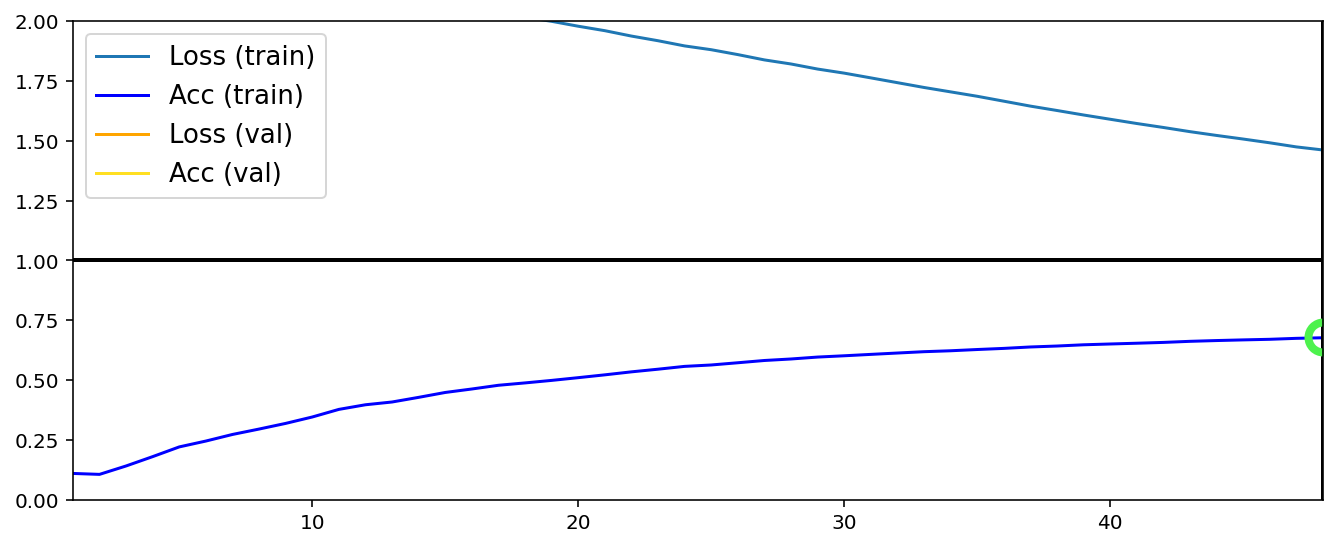


Fitting set 19...  (Loss, Acc) = (0.730483, 0.843750) 
Fitting set 34...  (Loss, Acc) = (0.744444, 0.824219) 
Fitting set 45...  (Loss, Acc) = (0.737642, 0.830729) 
Fitting set 41...  (Loss, Acc) = (0.714658, 0.830078) 
Fitting set 11...  (Loss, Acc) = (0.681132, 0.840625) 
Fitting set 18...  (Loss, Acc) = (0.677622, 0.841146) 
Fitting set 44...  (Loss, Acc) = (0.673376, 0.840402) 
Fitting set 47...  (Loss, Acc) = (0.655790, 0.851562) 
Fitting set 25...  (Loss, Acc) = (0.660664, 0.847222) 
Fitting set 46...  (Loss, Acc) = (0.653560, 0.849219) 
Fitting set 29...  (Loss, Acc) = (0.639829, 0.851562) 
Fitting set 28...  (Loss, Acc) = (0.644626, 0.848307) 
Fitting set 31...  (Loss, Acc) = (0.637792, 0.849760) 
Fitting set 36...  (Loss, Acc) = (0.627844, 0.851562) 
Fitting set 6...   (Loss, Acc) = (0.621225, 0.853125) 
Fitting set 37...  (Loss, Acc) = (0.609134, 0.857422) 
Fitting set 32...  (Loss, Acc) = (0.604663, 0.857077) 
Fitting set 7...   (Loss, Acc) = (0.602341, 0.855903) 
Fitting s

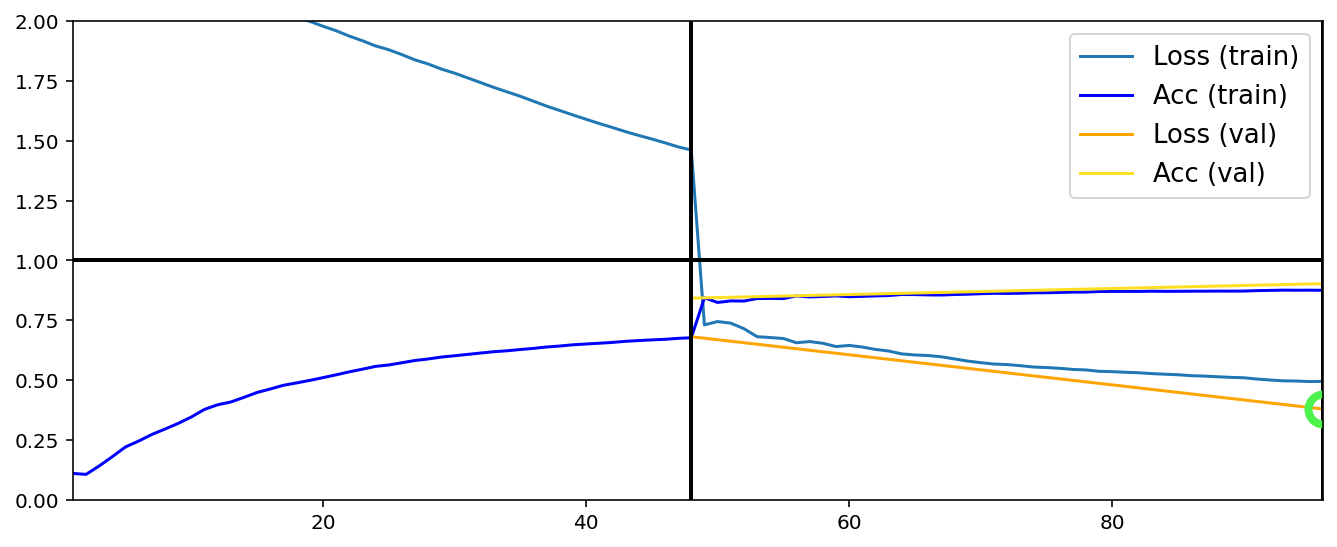


Fitting set 23...  (Loss, Acc) = (0.380823, 0.906250) 
Fitting set 2...   (Loss, Acc) = (0.347127, 0.910156) 
Fitting set 30...  (Loss, Acc) = (0.357445, 0.911458) 
Fitting set 40...  (Loss, Acc) = (0.363723, 0.908203) 
Fitting set 7...   (Loss, Acc) = (0.366744, 0.907813) 
Fitting set 9...   (Loss, Acc) = (0.370190, 0.902344) 
Fitting set 39...  (Loss, Acc) = (0.363610, 0.906250) 
Fitting set 43...  (Loss, Acc) = (0.365174, 0.904297) 
Fitting set 18...  (Loss, Acc) = (0.367330, 0.905382) 
Fitting set 38...  (Loss, Acc) = (0.359196, 0.909375) 
Fitting set 29...  (Loss, Acc) = (0.356097, 0.910511) 
Fitting set 36...  (Loss, Acc) = (0.351259, 0.911458) 
Fitting set 15...  (Loss, Acc) = (0.347963, 0.911659) 
Fitting set 32...  (Loss, Acc) = (0.351358, 0.910714) 
Fitting set 10...  (Loss, Acc) = (0.351178, 0.908333) 
Fitting set 34...  (Loss, Acc) = (0.357111, 0.905762) 
Fitting set 28...  (Loss, Acc) = (0.364671, 0.902574) 
Fitting set 12...  (Loss, Acc) = (0.357641, 0.904514) 
Fitting s

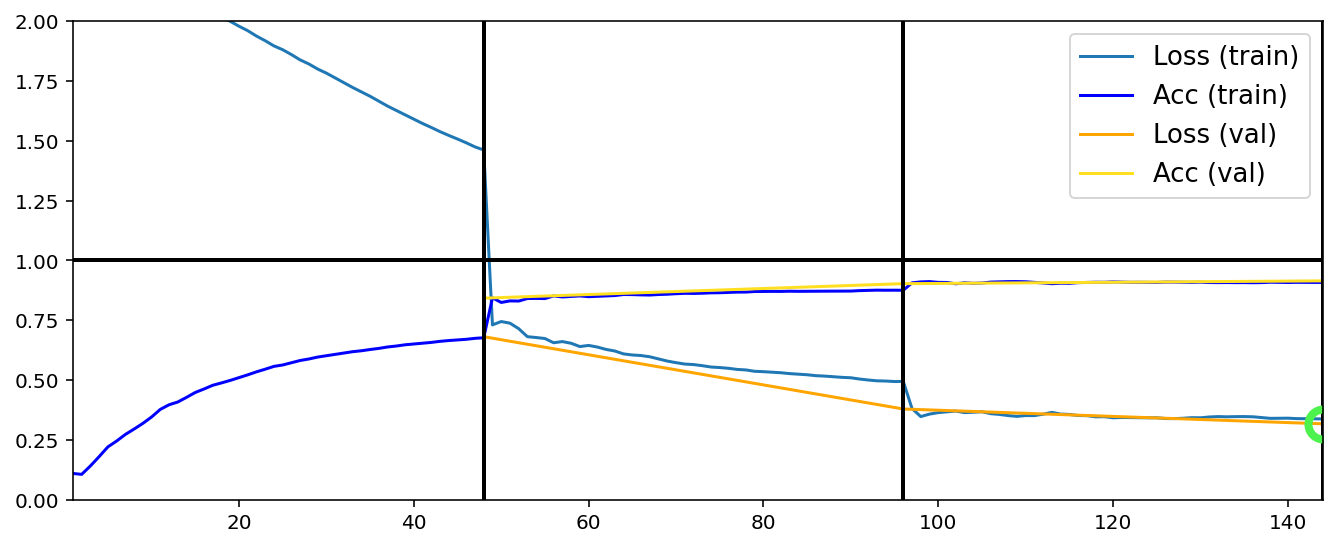

Training has concluded.


In [9]:
traingen.train()

### Delve deeper
DeepTrain offers much beyond the minimals; it's suggested to proceed with the advanced example before
exploring others.